In [45]:
#initialisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

In [47]:
#dataset panda dataframe
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24],
})

In [48]:
# define random seed as 200
np.random.seed(200)
# number of clusters we want
k = 3
# centroids[i] = [x, y] choose first centroid
centroids = {
    # select random number from 0 to 80
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

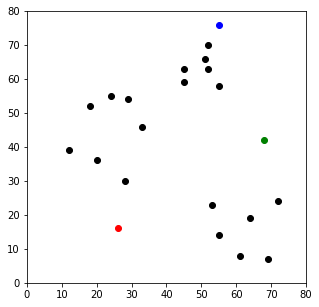

In [49]:
fig = plt.figure(figsize=(5,5))
# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_form_1  distance_form_2  distance_form_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


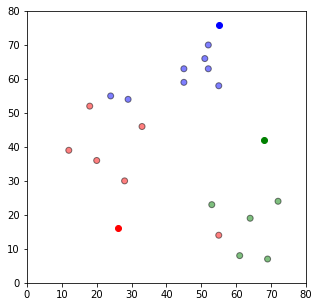

In [50]:
# assign stage assign each value to cluster
def assignment(df, centroids):
  for i in centroids.keys():
    # sqrt((x1-x2)^2 - (y1-y2)^2)
    df['distance_form_{}'.format(i)] = (
        np.sqrt(
            (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2
        )
    )

  centroid_distance_cols = ['distance_form_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_form_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

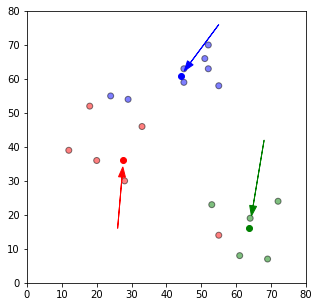

In [51]:
# centroids are updates
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

plt.show()
  

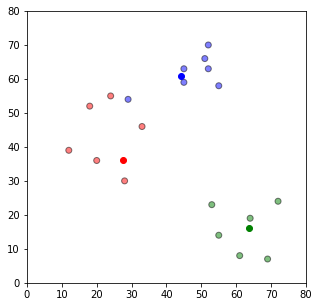

In [52]:
# repeat assignment stage
df = assignment(df, centroids)

# plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


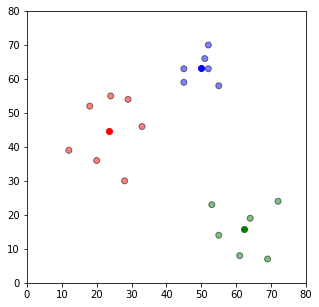

In [53]:
# continue untill all assigned categories don't change any more
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [54]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24],
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
# store values of x and y cordinates variables
kmeans.fit(df)

KMeans(n_clusters=3)

In [55]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

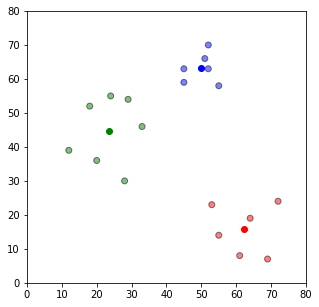

In [56]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')

for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [57]:
# add cluster values to metrics dataframe and print
df['closest'] = labels
df['distance'] = df.apply(
    lambda row: np.sqrt((row['x'] - centroids[row['closest']][0]) ** 2 + (row['y'] - centroids[row['closest']][1]) ** 2),
    axis=1
)
print(df.head())

    x   y  closest   distance
0  12  39        1  12.714286
1  20  36        1   9.231711
2  28  30        1  15.271689
3  18  52        1   9.200710
4  29  54        1  10.951656


C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


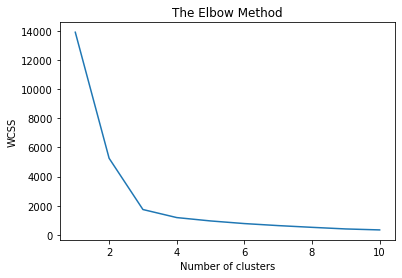

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

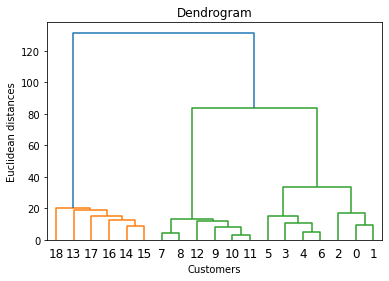

In [59]:
# heiracial clustering using dendrogram
import scipy.cluster.hierarchy as sch


# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

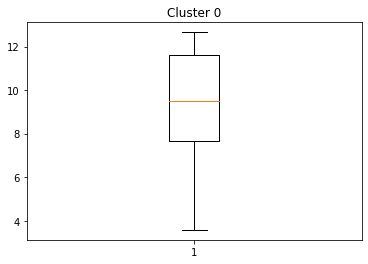

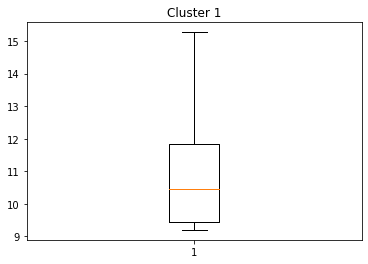

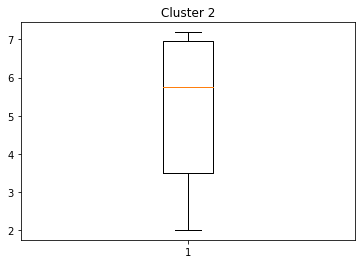

In [60]:
for i in range(3):
    plt.figure(i)
    plt.boxplot(df.loc[df['closest'] == i]['distance'])
    plt.title('Cluster ' + str(i))
    plt.show()

In [61]:
# Calculate avg silhoutte scores for each cluster
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(df, labels)
print(silhouette_avg)

0.6302299551209949


In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

#Initialising the visualizer
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(df)
visualizer.show()